In [4]:
import pandas as pd

In [5]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [6]:
data = pd.read_stata('kor_data_20220103.DTA')
data.head(1)

# 기본 정보: 'id', 'area', 'sex', 'birth', 'age' 

,id,area,size,sex,birth,age,a011,a012,a013,a014,...,a14,na14,a15,na15,a16,na16,a17,na17,bftype,bedu
0,1,강서구,서남권,여자,1971,만 50~59세,매우 신뢰한다,약간 신뢰한다,약간 신뢰한다,약간 신뢰한다,...,11,중등도 우울감,10,중간 수준,15,경미한 수준,26,자존감 보통 수준,부부+자녀,대학교 재학/수료/휴학/중퇴


In [ ]:
total = data.groupby('area').count()[['id']].reset_index().rename(columns={'id':'total'})
total

# 우울

### 2019 정신건강검진도구 및 사용에 대한 표준지침에 결과 해석

절단 점수: 5점


결과 해석:

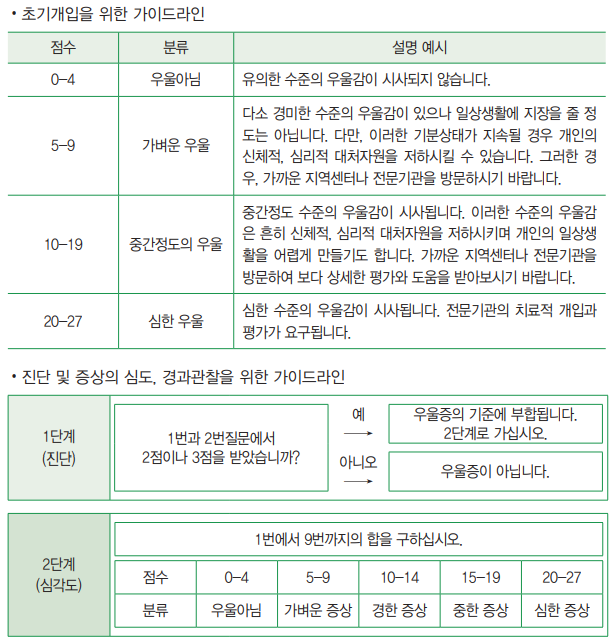


In [7]:
sad_df = data[['id', 'area', 'sex', 'birth', 'age', 'a141', 'a142', 'a143', 'a144', 'a145', 'a146', 'a147', 'a148', 'a149']]
sad_df

,id,area,sex,birth,age,a141,a142,a143,a144,a145,a146,a147,a148,a149
0,1,강서구,여자,1971,만 50~59세,2~6일,2~6일,2~6일,2~6일,2~6일,거의 매일,2~6일,2~6일,2~6일
1,2,강서구,여자,1980,만 40~49세,없음,없음,없음,없음,2~6일,2~6일,없음,없음,없음
2,3,성북구,여자,1969,만 50~59세,없음,없음,없음,없음,없음,없음,없음,없음,없음
3,4,서초구,여자,1963,만 50~59세,없음,없음,2~6일,2~6일,없음,2~6일,없음,없음,없음
4,5,양천구,남자,1957,만 60~69세,2~6일,2~6일,2~6일,없음,7일 이상,없음,없음,7일 이상,7일 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,서초구,남자,1994,만 19~29세,거의 매일,2~6일,7일 이상,7일 이상,거의 매일,없음,2~6일,7일 이상,7일 이상
1996,1997,영등포구,여자,1959,만 60~69세,없음,없음,거의 매일,없음,없음,2~6일,2~6일,없음,없음
1997,1998,강남구,여자,1972,만 50~59세,2~6일,2~6일,거의 매일,2~6일,없음,2~6일,없음,없음,없음
1998,1999,동작구,남자,1993,만 19~29세,7일 이상,없음,2~6일,없음,2~6일,없음,없음,없음,2~6일


In [8]:
cols = ['a141', 'a142', 'a143', 'a144', 'a145', 'a146', 'a147', 'a148', 'a149']

score2_mapping= {
    '없음': 0, 
    '2~6일': 1, 
    '7일 이상': 2, 
    '거의 매일': 3
    }

sad_df[cols] = sad_df[cols].replace(score2_mapping).astype(int)
sad_df

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\4198042968.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sad_df[cols] = sad_df[cols].replace(score2_mapping).astype(int)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\4198042968.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sad_df[cols] = sad_df[cols].replace(score2_mapping).astype(int)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\4198042968.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

,id,area,sex,birth,age,a141,a142,a143,a144,a145,a146,a147,a148,a149
0,1,강서구,여자,1971,만 50~59세,1,1,1,1,1,3,1,1,1
1,2,강서구,여자,1980,만 40~49세,0,0,0,0,1,1,0,0,0
2,3,성북구,여자,1969,만 50~59세,0,0,0,0,0,0,0,0,0
3,4,서초구,여자,1963,만 50~59세,0,0,1,1,0,1,0,0,0
4,5,양천구,남자,1957,만 60~69세,1,1,1,0,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,서초구,남자,1994,만 19~29세,3,1,2,2,3,0,1,2,2
1996,1997,영등포구,여자,1959,만 60~69세,0,0,3,0,0,1,1,0,0
1997,1998,강남구,여자,1972,만 50~59세,1,1,3,1,0,1,0,0,0
1998,1999,동작구,남자,1993,만 19~29세,2,0,1,0,1,0,0,0,1


In [9]:
def check_sad(n):
    if n <= 4:
        return '우울 아님'
    elif n >= 5 and n <= 9:
        return '가벼운 우울'
    elif n >= 10 and n <= 19:
        return '중간 정도의 우울'
    else: return '심한 우울'

# sad_df.groupby('area').sum()
sad_df['sad_total'] = sad_df[cols].sum(axis=1)
sad_df['척도'] = sad_df['sad_total'].apply(check_sad)

sad_df

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\412981591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sad_df['sad_total'] = sad_df[cols].sum(axis=1)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\412981591.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sad_df['척도'] = sad_df['sad_total'].apply(check_sad)


,id,area,sex,birth,age,a141,a142,a143,a144,a145,a146,a147,a148,a149,sad_total,척도
0,1,강서구,여자,1971,만 50~59세,1,1,1,1,1,3,1,1,1,11,중간 정도의 우울
1,2,강서구,여자,1980,만 40~49세,0,0,0,0,1,1,0,0,0,2,우울 아님
2,3,성북구,여자,1969,만 50~59세,0,0,0,0,0,0,0,0,0,0,우울 아님
3,4,서초구,여자,1963,만 50~59세,0,0,1,1,0,1,0,0,0,3,우울 아님
4,5,양천구,남자,1957,만 60~69세,1,1,1,0,2,0,0,2,2,9,가벼운 우울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,서초구,남자,1994,만 19~29세,3,1,2,2,3,0,1,2,2,16,중간 정도의 우울
1996,1997,영등포구,여자,1959,만 60~69세,0,0,3,0,0,1,1,0,0,5,가벼운 우울
1997,1998,강남구,여자,1972,만 50~59세,1,1,3,1,0,1,0,0,0,7,가벼운 우울
1998,1999,동작구,남자,1993,만 19~29세,2,0,1,0,1,0,0,0,1,5,가벼운 우울


### 우울 결과

In [ ]:
new_sad = sad_df[['area', 'sad_total', '척도']]

# 1) 구별 max, mean
stats = new_sad.groupby("area")["sad_total"].agg(["max", "mean"])

# 2) 구 + 척도별 개수 = 구별 비율
counts = new_sad.groupby(['area', '척도']).size().unstack(fill_value=0)

total_per_area = counts.sum(axis=1)
ratio = counts.div(total_per_area, axis=0) * 100

# 각 구별로 중증도별 인원 수
total_count = counts.reset_index().merge(total['total'], left_index=True, right_index=True, how="outer")

# 각 구별 중증도 비율
final_ratio = ratio[[
    '우울 아님', '가벼운 우울', '중간 정도의 우울', '심한 우울'
    ]].reset_index().merge(stats.reset_index()[['max', 'mean']], left_index=True, right_index=True, how="outer")

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\1675010751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = new_sad.groupby("area")["sad_total"].agg(["max", "mean"])
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\1675010751.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = new_sad.groupby(['area', '척도']).size().unstack(fill_value=0)


In [167]:
# 각 구별 중증도 비율
final_ratio

,area,우울 아님,가벼운 우울,중간 정도의 우울,심한 우울,max,mean
0,강남구,52.201258,22.012579,21.383648,4.402516,24,5.905660
1,강동구,56.164384,23.287671,19.178082,1.369863,22,5.506849
2,강북구,46.341463,39.024390,12.195122,2.439024,27,5.560976
3,강서구,45.794393,26.168224,21.495327,6.542056,27,6.616822
4,관악구,49.572650,32.478632,15.384615,2.564103,27,5.384615
5,광진구,57.575758,22.727273,16.666667,3.030303,26,5.363636
6,구로구,52.173913,31.521739,14.130435,2.173913,27,5.510870
7,금천구,51.020408,26.530612,20.408163,2.040816,21,5.632653
8,노원구,55.371901,24.793388,19.008264,0.826446,27,5.413223
9,도봉구,40.350877,28.070175,26.315789,5.263158,27,7.157895


In [ ]:
# 각 구별로 중증도별 인원 수
total_count

,area,가벼운 우울,심한 우울,우울 아님,중간 정도의 우울,total
0,강남구,35,7,83,34,159
1,강동구,17,1,41,14,73
2,강북구,16,1,19,5,41
3,강서구,28,7,49,23,107
4,관악구,38,3,58,18,117
5,광진구,15,2,38,11,66
6,구로구,29,2,48,13,92
7,금천구,13,1,25,10,49
8,노원구,30,1,67,23,121
9,도봉구,16,3,23,15,57


In [ ]:
# # 
# total_count.to_csv("우울_구민_수.csv", index=False, encoding="utf-8-sig")

In [ ]:
# sad_count_js = total_count.to_dict(orient = 'records')

In [ ]:
# import json
# with open('우울_구민_수.json', 'w', encoding="utf-8") as f:
#     json.dump(sad_count_js, f, ensure_ascii=False, indent=4)

# 불안

### 2019 정신건강검진도구 및 사용에 대한 표준지침에 결과 해석

절단 점수: 6점


결과 해석:

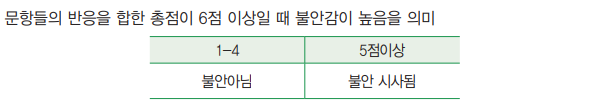

In [174]:
# 불안
anexity_df = data[['id', 'area', 'sex', 'birth', 'age', 'a151', 'a152', 'a153', 'a154', 'a155', 'a156', 'a157']]
anexity_df

,id,area,sex,birth,age,a151,a152,a153,a154,a155,a156,a157
0,1,강서구,여자,1971,만 50~59세,전혀 방해 받지 않았다,2주 중 절반 이상은 방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,2주 중 절반 이상은 방해 받았다,거의 매일 방해 받았다
1,2,강서구,여자,1980,만 40~49세,며칠 동안방해 받았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다
2,3,성북구,여자,1969,만 50~59세,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다
3,4,서초구,여자,1963,만 50~59세,전혀 방해 받지 않았다,전혀 방해 받지 않았다,며칠 동안방해 받았다,며칠 동안방해 받았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다
4,5,양천구,남자,1957,만 60~69세,2주 중 절반 이상은 방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,서초구,남자,1994,만 19~29세,2주 중 절반 이상은 방해 받았다,거의 매일 방해 받았다,2주 중 절반 이상은 방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,2주 중 절반 이상은 방해 받았다,2주 중 절반 이상은 방해 받았다
1996,1997,영등포구,여자,1959,만 60~69세,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다
1997,1998,강남구,여자,1972,만 50~59세,전혀 방해 받지 않았다,며칠 동안방해 받았다,며칠 동안방해 받았다,며칠 동안방해 받았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다
1998,1999,동작구,남자,1993,만 19~29세,며칠 동안방해 받았다,전혀 방해 받지 않았다,며칠 동안방해 받았다,전혀 방해 받지 않았다,전혀 방해 받지 않았다,며칠 동안방해 받았다,전혀 방해 받지 않았다


In [175]:
cols1 = ['a151', 'a152', 'a153', 'a154', 'a155', 'a156', 'a157']

In [176]:
score_mapping1= {
    '전혀 방해 받지 않았다': 0, 
    '며칠 동안방해 받았다': 1, 
    '2주 중 절반 이상은 방해 받았다': 2, 
    '거의 매일 방해 받았다': 3
    }

anexity_df[cols1] = anexity_df[cols1].replace(score_mapping1).astype(int)
anexity_df

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3861957826.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  anexity_df[cols1] = anexity_df[cols1].replace(score_mapping1).astype(int)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3861957826.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  anexity_df[cols1] = anexity_df[cols1].replace(score_mapping1).astype(int)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3861957826.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

,id,area,sex,birth,age,a151,a152,a153,a154,a155,a156,a157
0,1,강서구,여자,1971,만 50~59세,0,2,1,1,1,2,3
1,2,강서구,여자,1980,만 40~49세,1,0,0,0,0,0,0
2,3,성북구,여자,1969,만 50~59세,0,0,0,0,0,0,0
3,4,서초구,여자,1963,만 50~59세,0,0,1,1,0,0,0
4,5,양천구,남자,1957,만 60~69세,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,서초구,남자,1994,만 19~29세,2,3,2,1,1,2,2
1996,1997,영등포구,여자,1959,만 60~69세,0,0,0,0,0,0,0
1997,1998,강남구,여자,1972,만 50~59세,0,1,1,1,0,0,0
1998,1999,동작구,남자,1993,만 19~29세,1,0,1,0,0,1,0


In [177]:
def check_anex(n):
    if n >= 5:
        return '불안 시사됨'
    else: return '불안 아님'

In [178]:
anexity_df['anexity_total'] = anexity_df[cols1].sum(axis=1)
anexity_df['척도'] = anexity_df['anexity_total'].apply(check_anex)

new = anexity_df[['id', 'area', 'anexity_total', '척도']]
new

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3719047808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anexity_df['anexity_total'] = anexity_df[cols1].sum(axis=1)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3719047808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anexity_df['척도'] = anexity_df['anexity_total'].apply(check_anex)


,id,area,anexity_total,척도
0,1,강서구,10,불안 시사됨
1,2,강서구,1,불안 아님
2,3,성북구,0,불안 아님
3,4,서초구,2,불안 아님
4,5,양천구,8,불안 시사됨
...,...,...,...,...
1995,1996,서초구,13,불안 시사됨
1996,1997,영등포구,0,불안 아님
1997,1998,강남구,3,불안 아님
1998,1999,동작구,3,불안 아님


### 불안 결과

In [179]:
# 1) 구별 max, mean
stats = new.groupby("area")["anexity_total"].agg(["max", "mean"])

# 2) 구 + 척도별 개수 = 구별 비율
counts = new.groupby(['area', '척도']).size().unstack(fill_value=0)

total_per_area = counts.sum(axis=1)
ratio = counts.div(total_per_area, axis=0) * 100

# 3) 합치기
final_anex = ratio.merge(stats, left_index=True, right_index=True, how="outer")

final_anex.reset_index().sort_values('불안 시사됨', ascending=False)

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3542965333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = new.groupby("area")["anexity_total"].agg(["max", "mean"])
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3542965333.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = new.groupby(['area', '척도']).size().unstack(fill_value=0)


,area,불안 시사됨,불안 아님,max,mean
9,도봉구,49.122807,50.877193,21,5.385965
22,종로구,44.117647,55.882353,21,4.970588
21,은평구,41.176471,58.823529,20,4.176471
7,금천구,40.816327,59.183673,18,4.102041
2,강북구,39.024390,60.975610,21,4.317073
4,관악구,38.461538,61.538462,21,4.256410
6,구로구,38.043478,61.956522,21,3.989130
3,강서구,37.383178,62.616822,21,4.280374
23,중구,37.037037,62.962963,15,3.925926
19,영등포구,36.893204,63.106796,21,4.165049


In [181]:
final_anex.to_csv("불안_비율.csv", index=False, encoding="utf-8-sig")
anex_js = final_anex.to_dict(orient = 'records')


with open('불안_비율.json', 'w', encoding="utf-8") as f:
    json.dump(anex_js, f, ensure_ascii=False, indent=4)

# 스트레스

### 2019 정신건강검진도구 및 사용에 대한 표준지침에 결과 해석

절단점수:

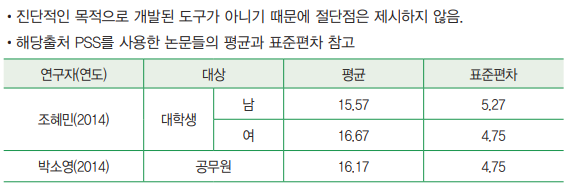

소척도:

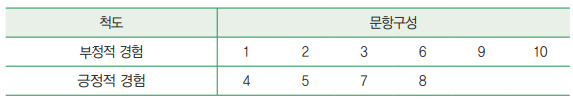

결과해석:

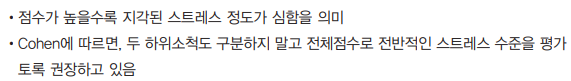

In [183]:
stress_df = data[['id', 'area', 'sex', 'birth', 'age', 'a141', 'a142', 'a143', 'a144', 'a145', 'a146', 'a147', 'a148', 'a149']]
stress_df
cols = ['a141', 'a142', 'a143', 'a144', 'a145', 'a146', 'a147', 'a148', 'a149']

score_mapping3= {
    '없음': 0, 
    '2~6일': 1, 
    '7일 이상': 2, 
    '거의 매일': 3
    }

stress_df[cols] = stress_df[cols].replace(score_mapping3).astype(int)
stress_df

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\610303761.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stress_df[cols] = stress_df[cols].replace(score_mapping3).astype(int)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\610303761.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  stress_df[cols] = stress_df[cols].replace(score_mapping3).astype(int)
C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\610303761.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

,id,area,sex,birth,age,a141,a142,a143,a144,a145,a146,a147,a148,a149
0,1,강서구,여자,1971,만 50~59세,1,1,1,1,1,3,1,1,1
1,2,강서구,여자,1980,만 40~49세,0,0,0,0,1,1,0,0,0
2,3,성북구,여자,1969,만 50~59세,0,0,0,0,0,0,0,0,0
3,4,서초구,여자,1963,만 50~59세,0,0,1,1,0,1,0,0,0
4,5,양천구,남자,1957,만 60~69세,1,1,1,0,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,서초구,남자,1994,만 19~29세,3,1,2,2,3,0,1,2,2
1996,1997,영등포구,여자,1959,만 60~69세,0,0,3,0,0,1,1,0,0
1997,1998,강남구,여자,1972,만 50~59세,1,1,3,1,0,1,0,0,0
1998,1999,동작구,남자,1993,만 19~29세,2,0,1,0,1,0,0,0,1


In [191]:
stress_df['stress_total'] = stress_df[cols].sum(axis=1)
new_stress = stress_df[['area', 'sex', 'age', 'stress_total']]
new_stress.sort_values('area')

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\3005756183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress_df['stress_total'] = stress_df[cols].sum(axis=1)


,area,sex,age,stress_total
1274,강남구,남자,만 30~39세,12
1774,강남구,남자,만 40~49세,2
1775,강남구,여자,만 50~59세,2
328,강남구,남자,만 50~59세,0
1064,강남구,남자,만 50~59세,2
...,...,...,...,...
220,중랑구,여자,만 50~59세,4
1324,중랑구,여자,만 19~29세,3
320,중랑구,남자,만 40~49세,19
1157,중랑구,여자,만 19~29세,15


In [185]:
stats = new_stress[["stress_total"]].agg(["max", "mean"])
stats

,stress_total
max,27.000
mean,5.432


### 스트레스 결과

In [189]:
test1 = new_stress.groupby('area')[['stress_total']].agg('mean').reset_index()
test1.sort_values('stress_total', ascending=False)
final_stress = test1.rename(columns={'stress_total': '스트레스 원점수 평균'})
final_stress

C:\Users\sunny\AppData\Local\Temp\ipykernel_7980\2947089607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test1 = new_stress.groupby('area')[['stress_total']].agg('mean').reset_index()


,area,스트레스 원점수 평균
0,강남구,5.905660
1,강동구,5.506849
2,강북구,5.560976
3,강서구,6.616822
4,관악구,5.384615
5,광진구,5.363636
6,구로구,5.510870
7,금천구,5.632653
8,노원구,5.413223
9,도봉구,7.157895


In [ ]:
# new_stress.to_csv("스트레스_원점수.csv", index=False, encoding="utf-8-sig")
# stress_sc_js = new_stress.to_dict(orient = 'records')


# with open('스트레스_원점수.json', 'w', encoding="utf-8") as f:
#     json.dump(stress_sc_js, f, ensure_ascii=False, indent=4)